In [50]:
# CUSTOMER CHURN PREDICTION MODEL

## PROBLEM STATEMENT:
**The goal is to predict whether a customer will churn based on their demographics, account information, subscribed services, and billing details. This is a binary classification problem, where:**

**Input: Customer attributes (numerical + categorical features)**

**Output: Churn status (Yes or No)**

## KAGGLE DATASET

**https://www.kaggle.com/datasets/mustafaoz158/telco-customer-churn**

## DATASET OVERVIEW:
**The dataset contains detailed information about a telecom company’s customers, including:**

**Demographics:** Gender, SeniorCitizen, Partner, Dependents

**Account Information:** Tenure, Contract type, Payment method, Paperless billing

**Services Subscribed:** Phone service, Internet service, Online security, Online backup, Device protection, Tech support, Streaming TV, Streaming movies

**Charges:** Monthly charges, Total charges

**Target Variable:** Churn (Yes/No)

## LIBRARIES REQUIRED
* **pandas** - For data loading, cleaning and manipulation
* **Matplotlib** - For Plotting the charts
* **Seaborn** - For Data Visualization (EDA)
* **Scikit-Learn**  - For machine learning, building model, preprocessing, and evaluation.
* **joblib** - For saving models, encoders and scaler

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

## LOADING DATA

In [52]:
data = pd.read_csv("Telco-Customer-Churn.csv")
df = pd.DataFrame(data)

## CLEANING DATA, HANDLING MISSING VALUES, CHECKING DATA TYPES:

In [53]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
# Displaying count of each category for categorical columns
for col in df.select_dtypes(include=[object]).columns:
    print(df[col].value_counts())
    print('--' * 20)

customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
9237-HQITU    1
             ..
6840-RESVB    1
2234-XADUH    1
4801-JZAZL    1
8361-LTMKD    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No       

In [56]:
#df.drop(columns = ["customerID"], inplace = True)

# convert TotalCharges to numeric safely
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


C:\Users\bjc\AppData\Local\Temp\ipykernel_16524\1282520868.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


## EDA 

In [57]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

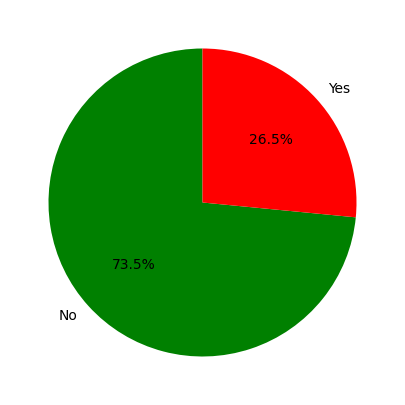

In [58]:
plt.figure(figsize= (6, 5))
plt.pie(x = df["Churn"].value_counts(), data = df, labels = ["No", "Yes"],  autopct="%1.1f%%", startangle=90,colors = ["green", "red"])
plt.show()

In [59]:
def bar_charts(column):
    plt.figure(figsize=(6,4))
    df.groupby(column)["Churn"].value_counts().unstack().plot(kind="bar", color = ["green", "red"])
    plt.title(f"Churn by {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(["No Churn", "Churn"])
    plt.show()

<Figure size 600x400 with 0 Axes>

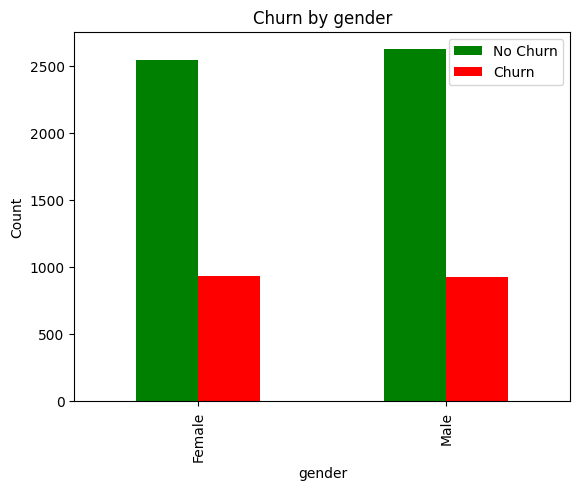

<Figure size 600x400 with 0 Axes>

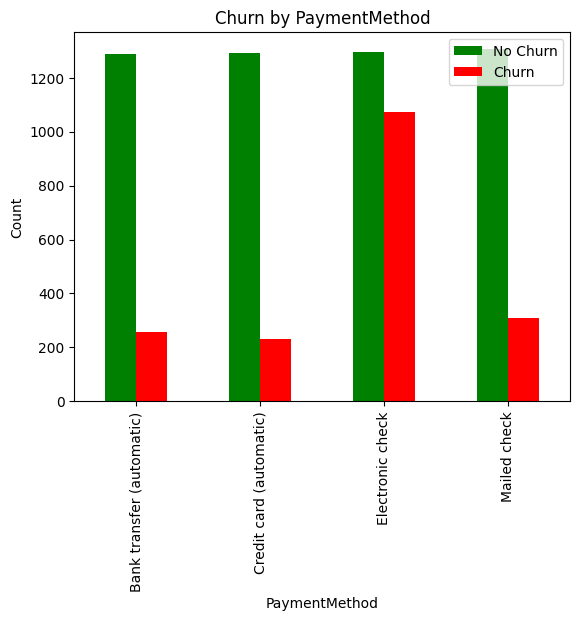

<Figure size 600x400 with 0 Axes>

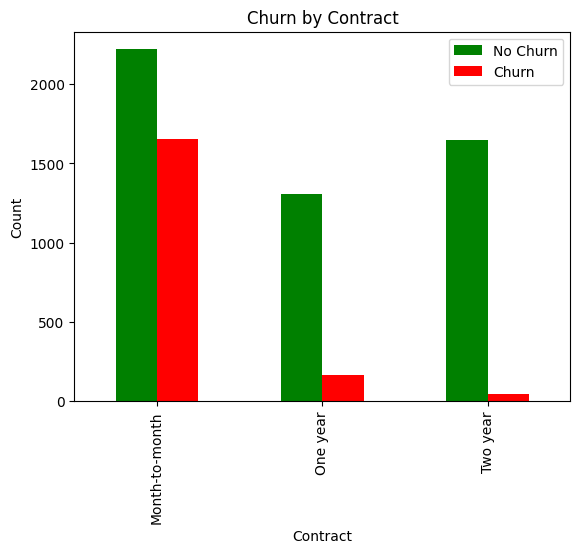

<Figure size 600x400 with 0 Axes>

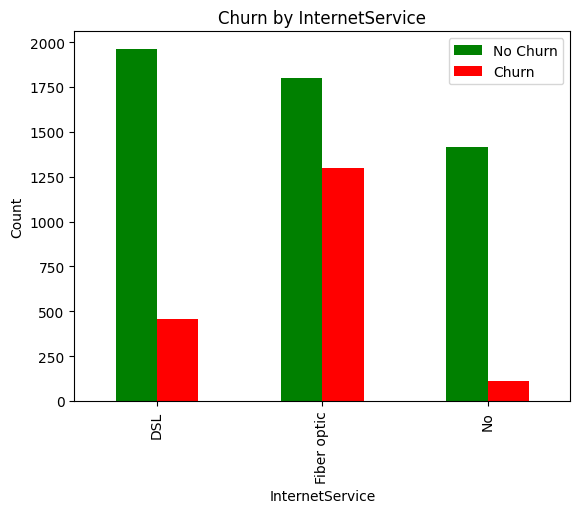

In [60]:
# Using bar charts for generating different columns by churn
bar_charts("gender")
bar_charts("PaymentMethod")
bar_charts("Contract")
bar_charts("InternetService")

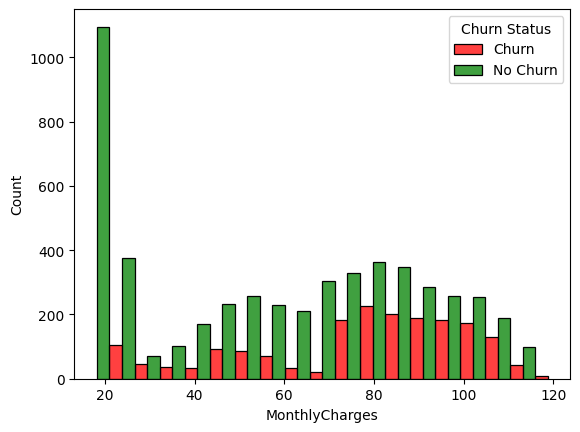

In [61]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", palette =  ["green", "red"], multiple = "dodge")
plt.legend(title="Churn Status", labels=["Churn", "No Churn"])

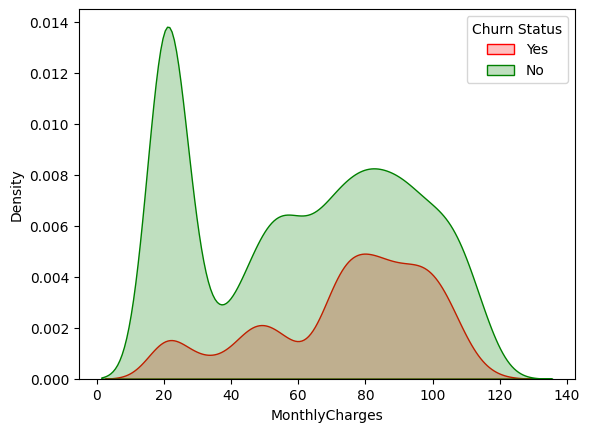

In [62]:
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill = True, palette = ["green", "red"])
plt.legend(title = "Churn Status", labels = ["Yes", "No"])

C:\Users\bjc\AppData\Local\Temp\ipykernel_16524\2604094859.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_services[col] = df_services[col].replace({"Yes":1, "No":0, "No phone service":0, "No internet service":0})


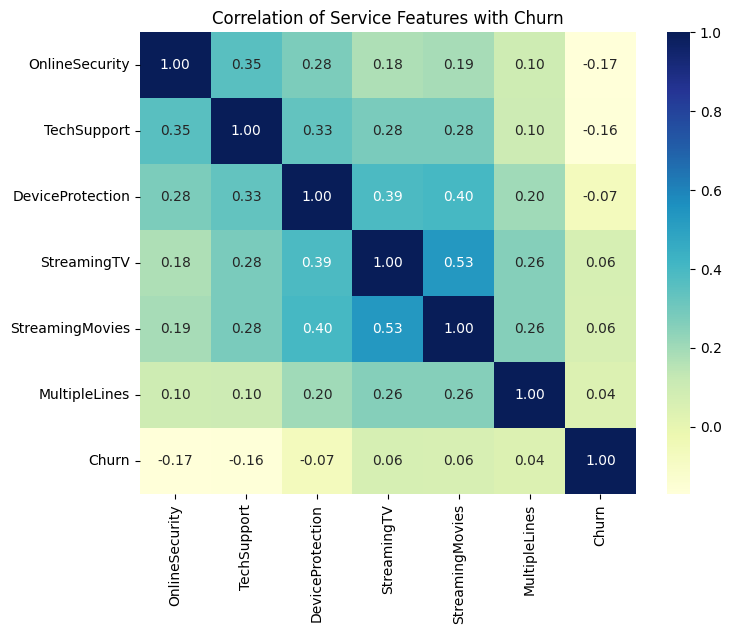

In [63]:
# List of service-related columns
service_cols = [
    "OnlineSecurity",
    "TechSupport",
    "DeviceProtection",
    "StreamingTV",
    "StreamingMovies",
    "MultipleLines",
    "Churn"   # target
]

# Make sure all are numeric (0/1)
df_services = df[service_cols].copy()
for col in df_services.columns:
    df_services[col] = df_services[col].replace({"Yes":1, "No":0, "No phone service":0, "No internet service":0})

# Compute correlation matrix
corr = df_services.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation of Service Features with Churn")
plt.show()


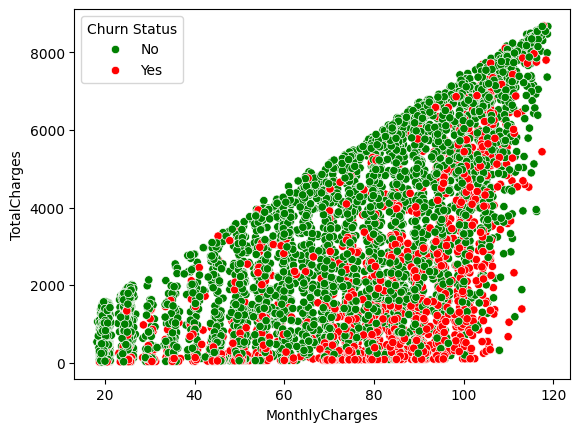

In [64]:
sns.scatterplot(x = df["MonthlyCharges"], y = df["TotalCharges"], hue = df["Churn"], palette = ["green", "red"])
plt.legend(title = "Churn Status")

In [65]:
## CREATING CLASSIFICATION MODEL: LOGISTIC REGRESSION

**ENCODING CATEGORICAL DATA**

**Label Encoding For Columns with value count: 2**

In [66]:
# Using Label Encoder for: ["gender", "Partner", "Dependents", "PhoneService",  "PaperlessBilling", "Churn"]

LEColumns = df.drop(columns = ["MultipleLines", "InternetService", "Contract", "PaymentMethod", "OnlineSecurity", "DeviceProtection","TechSupport","OnlineBackup", "StreamingTV","StreamingMovies"])

le = LabelEncoder()
categorical_cols = LEColumns.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col]  = le.fit_transform(df[col])

**One Hot Encoding For Columns with more than 2 values**

In [67]:
# sparse=False gives a DataFrame instead of sparse matrix
ohe = OneHotEncoder(sparse_output=False, drop=None)  # drop=None to keep all categories

# Columns with more than 2 unique values
ohe_columns = ["MultipleLines", "InternetService", "Contract", "PaymentMethod", "OnlineSecurity", "DeviceProtection","TechSupport","OnlineBackup", "StreamingTV","StreamingMovies"]

# Ensure they are strings
for col in ohe_columns:
    df[col] = df[col].astype(str)

# Initialize encoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform
ohe_array = ohe.fit_transform(df[ohe_columns])
ohe_cols = ohe.get_feature_names_out(ohe_columns)
ohe_df = pd.DataFrame(ohe_array, columns=ohe_cols, index=df.index)

# Drop original columns and concatenate OHE columns
df = df.drop(columns=ohe_columns)
df = pd.concat([df, ohe_df], axis=1)



**Training Datasets:**

In [68]:
x = df.drop(columns = ["Churn"])
y = df["Churn"]

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

**Scaling Data**

In [70]:
scaler = StandardScaler()

numeric_cols = ['tenure','MonthlyCharges','TotalCharges']

x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])   # fit + transform
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])         # only transform because this is test data 


**Creating A Model**

In [71]:
Model = LogisticRegression(max_iter = 1000)

In [72]:
Model.fit(x_train,y_train)

C:\Users\bjc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [73]:
y_pred = Model.predict(x_test)

**Checking Accuracy Score**

In [74]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8183108587650816


**Classification Report**

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



**Checking Confusion Matrix**

In [78]:
print(confusion_matrix(y_test, y_pred))

[[932 104]
 [152 221]]


**Saving The Models**

In [82]:
joblib.dump(Model, "churn_model.pkl")      
joblib.dump(le, "label_encoder.pkl")       
joblib.dump(ohe, "onehot_encoder.pkl")     
joblib.dump(scaler, "scaler.pkl")  

['scaler.pkl']